<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 170.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 162.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 162.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 158.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 108.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 173.2 MB/s eta 0:00:00


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [11]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [12]:
# Create a list of critical columns
critical_cols = ['Employment', 'JobSat', 'RemoteWork']

# Calculate percentage of missing values
missing_info = df[critical_cols].isnull().mean() * 100
print("Percentage of missing values per column:")
print(missing_info)

Percentage of missing values per column:
Employment     0.000000
JobSat        55.490013
RemoteWork    16.246160
dtype: float64


In [14]:
# Drop entries where JobSat value is empty
df.dropna(subset=['JobSat'], inplace=True)

# Find and replace NA entries with the most frequent value in RemoteWork
remotework_mode = df['RemoteWork'].mode()[0]
df['RemoteWork'] = df['RemoteWork'].fillna(remotework_mode)

# Verify changes by calculating percentage of missing values
missing_info = df[critical_cols].isnull().mean() * 100
print("Percentage of missing values per column:")
print(missing_info)

Percentage of missing values per column:
Employment    0.0
JobSat        0.0
RemoteWork    0.0
dtype: float64


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


/tmp/ipykernel_299/3943051933.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_sat = analysis_df.groupby('ExperienceRange')['JobSat'].median().reset_index()


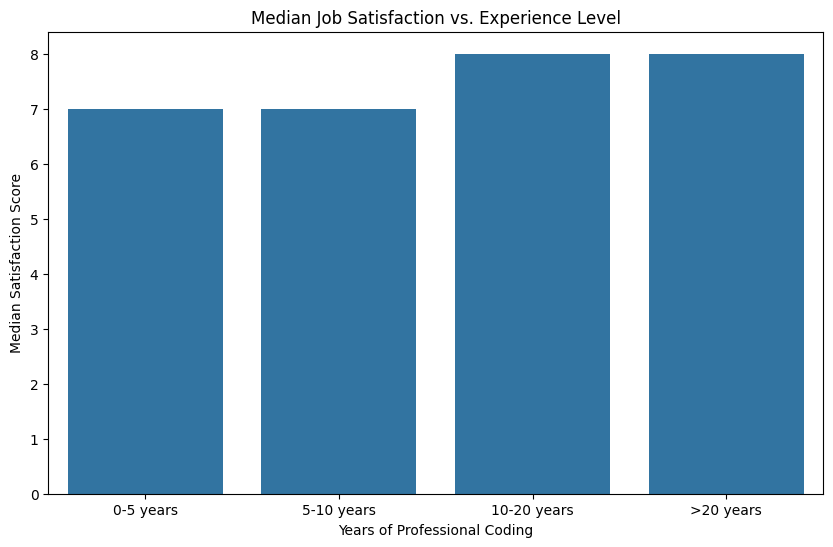

In [18]:
# Clean YearsCodePro and convert to numeric
df['YearsCodePro'] = df['YearsCodePro'].replace({'Less than 1 year': 0, 'More than 50 years': 51})
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Create Experience Ranges
bins = [0, 5, 10, 20, 100]
labels = ['0-5 years', '5-10 years', '10-20 years', '>20 years']
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, include_lowest=True)

# Calculate Median JobSat for each range
analysis_df = df.dropna(subset=['JobSat', 'ExperienceRange'])
median_sat = analysis_df.groupby('ExperienceRange')['JobSat'].median().reset_index()

# Create visualisation with a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='ExperienceRange', y='JobSat', data=median_sat)
plt.title('Median Job Satisfaction vs. Experience Level')
plt.xlabel('Years of Professional Coding')
plt.ylabel('Median Satisfaction Score')

plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


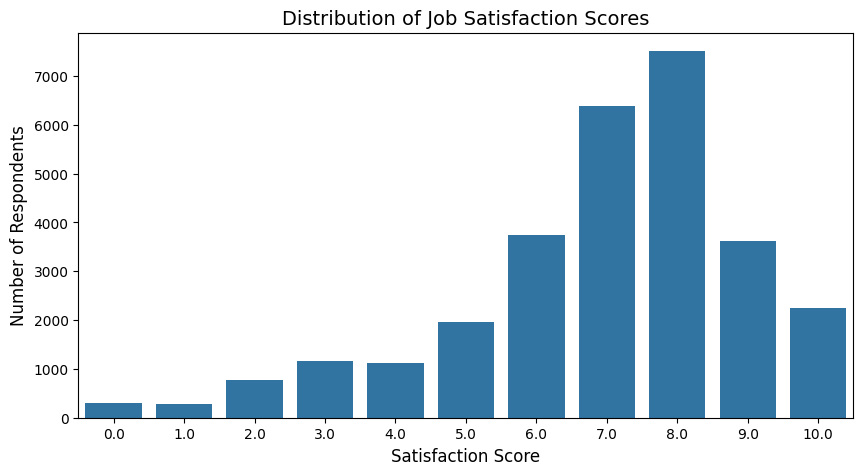

In [19]:
# Create the count plot visualisation
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='JobSat')
plt.title('Distribution of Job Satisfaction Scores', fontsize=14)
plt.xlabel('Satisfaction Score', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)

plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


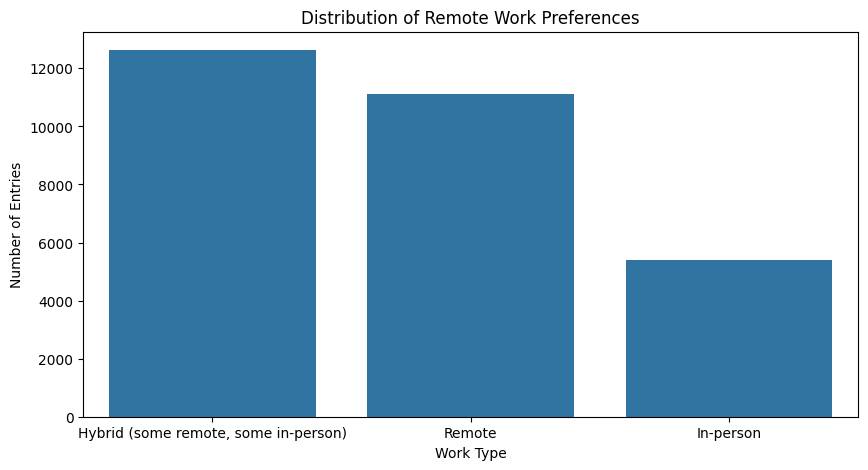

In [27]:
# Count plot for RemoteWork distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='RemoteWork', order=df['RemoteWork'].value_counts().index)

plt.title('Distribution of Remote Work Preferences')
plt.xlabel('Work Type')
plt.ylabel('Number of Entries')
plt.show()

In [30]:
# Initialize the new column with a default value
df['Employment_Group'] = 'Other'

# Assign categories using .loc and .str.contains()
# We use na=False to ensure missing values don't cause errors
df.loc[df['Employment'].str.contains('full-time', case=False, na=False), 'Employment_Group'] = 'Full-time'
df.loc[df['Employment'].str.contains('part-time', case=False, na=False), 'Employment_Group'] = 'Part-time'
df.loc[df['Employment'].str.contains('contractor|freelancer|self-employed', case=False, na=False), 'Employment_Group'] = 'Contractor'
df.loc[df['Employment'].str.contains('Not employed|Student|Retired', case=False, na=False), 'Employment_Group'] = 'Not Employed'

# Verify the result
print(df['Employment_Group'].value_counts())

Employment_Group
Full-time       22537
Contractor       3852
Not Employed     2076
Part-time         661
Name: count, dtype: int64


In [32]:
# Create the cross-tabulation table with RemoteWork and Employment
employment_remote_analysis = pd.crosstab(
    df['Employment_Group'], 
    df['RemoteWork'], 
    normalize='index'
) * 100

# Display the cross table
print("\nRemote Work Distribution by Employment Category (%):")
print(employment_remote_analysis.round(2))


Remote Work Distribution by Employment Category (%):
RemoteWork        Hybrid (some remote, some in-person)  In-person  Remote
Employment_Group                                                         
Contractor                                       34.94       8.05   57.01
Full-time                                        44.41      19.92   35.67
Not Employed                                     46.05      22.83   31.12
Part-time                                        48.41      17.85   33.74


In [33]:
# Create the cross-tabulation with RemoteWork and job roles (PrimaryRole)
role_remote_xtab = pd.crosstab(
    df['PrimaryRole'], 
    df['RemoteWork'], 
    normalize='index'
) * 100

# Display the result
print("Remote Work Preferences by Job Role (Percentages):")
print(role_remote_xtab.round(2))

Remote Work Preferences by Job Role (Percentages):
RemoteWork                                     Hybrid (some remote, some in-person)  \
PrimaryRole                                                                           
Academic researcher                                                           58.53   
Blockchain                                                                    13.21   
Cloud infrastructure engineer                                                 40.90   
Data engineer                                                                 50.08   
Data or business analyst                                                      50.22   
Data scientist or machine learning specialist                                 55.75   
Database administrator                                                        37.88   
Designer                                                                      43.90   
DevOps specialist                                                             5

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


In [36]:
df[['LanguageHaveWorkedWith']].head()

,LanguageHaveWorkedWith
10,JavaScript;Python;Ruby
12,Bash/Shell (all shells);C#;JavaScript;PowerShe...
15,C#;HTML/CSS;JavaScript;PowerShell;SQL;TypeScri...
18,C#;HTML/CSS;JavaScript;PHP;Python;SQL
20,Bash/Shell (all shells);HTML/CSS;PHP;Python;SQ...


/tmp/ipykernel_299/2807058919.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_languages['LanguageList'] = df_languages['LanguageHaveWorkedWith'].str.split(';')


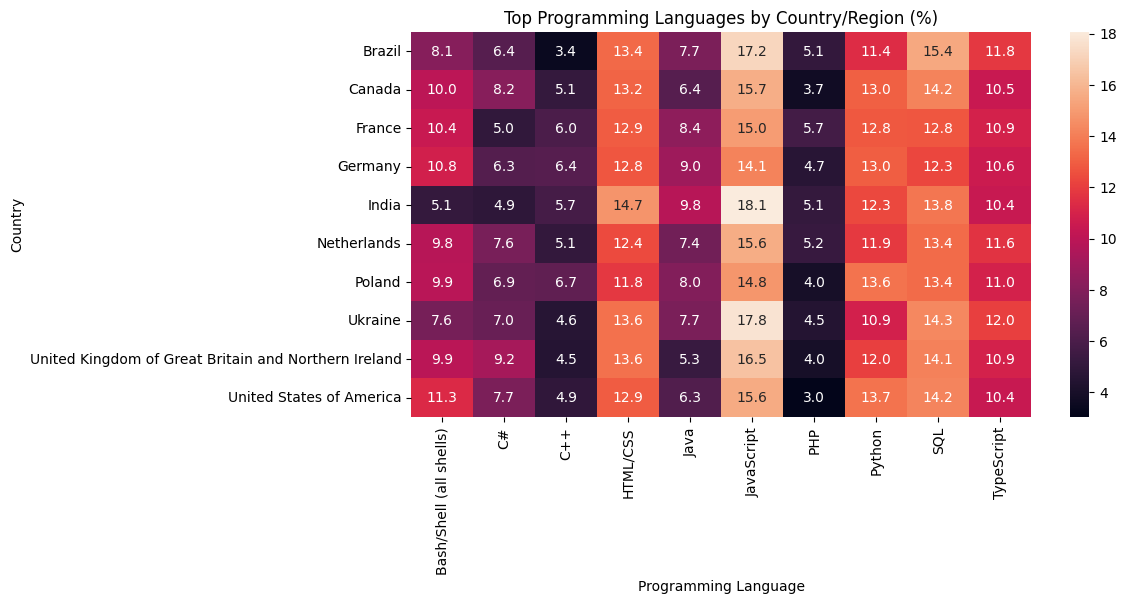

In [37]:
# Drop rows where language or country data is missing
df_languages = df.dropna(subset=['LanguageHaveWorkedWith', 'Country'])

# Split the semicolon-separated strings into lists
df_languages['LanguageList'] = df_languages['LanguageHaveWorkedWith'].str.split(';')

# Expand the list of languages
df_exploded = df_languages.explode('LanguageList')

# Identify the top 10 countries by number of respondents
top_countries = df['Country'].value_counts().nlargest(10).index
df_top_regions = df_exploded[df_exploded['Country'].isin(top_countries)]

# Calculate the top 10 languages
top_languages = df_exploded['LanguageList'].value_counts().nlargest(10).index
df_final_plot = df_top_regions[df_top_regions['LanguageList'].isin(top_languages)]

# Create a cross-tabulation of Country vs Language
lang_country_xtab = pd.crosstab(df_final_plot['Country'], df_final_plot['LanguageList'], normalize='index') * 100

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(lang_country_xtab, annot=True, fmt=".1f")

plt.title('Top Programming Languages by Country/Region (%)')
plt.xlabel('Programming Language')
plt.ylabel('Country')
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


In [38]:
# Check datatype of JobSatPoints_1
print(df['JobSatPoints_1'].dtype)

float64


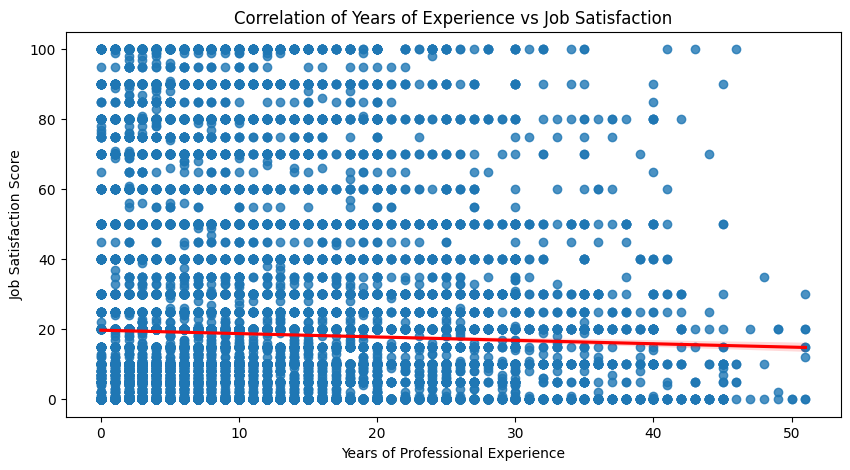

In [45]:
# Preprocess YearsCodePro by converting strings to numbers
df['YearsCodePro'] = df['YearsCodePro'].replace({'Less than 1 year': 0, 'More than 50 years': 51})
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop missing values in YearsCodePro and JobSatPoints_1
plot_data = df.dropna(subset=['YearsCodePro', 'JobSatPoints_1'])

# Create a scatter plot to show YearsCodePro vs JobSatPoints_1
plt.figure(figsize=(10, 5))
sns.regplot(
    data=plot_data, 
    x='YearsCodePro', 
    y='JobSatPoints_1', 
    line_kws={'color':'red'},
)
plt.title('Correlation of Years of Experience vs Job Satisfaction')
plt.xlabel('Years of Professional Experience')
plt.ylabel('Job Satisfaction Score')
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


In [48]:
df['Employment_Group'].unique()

array(['Full-time', 'Not Employed', 'Contractor', 'Part-time'],
      dtype=object)

In [49]:
# Simplify Education Levels
df['EdLevel_Simplified'] = 'Other'
df.loc[df['EdLevel'].str.contains('Bachelor', na=False), 'EdLevel_Simplified'] = 'Bachelor'
df.loc[df['EdLevel'].str.contains('Master', na=False), 'EdLevel_Simplified'] = 'Master'
df.loc[df['EdLevel'].str.contains('Professional degree|JD|MD', na=False), 'EdLevel_Simplified'] = 'Professional'
df.loc[df['EdLevel'].str.contains('Associate degree', na=False), 'EdLevel_Simplified'] = 'Associate'
df.loc[df['EdLevel'].str.contains('Secondary school|Primary', na=False), 'EdLevel_Simplified'] = 'No Degree'

# Create the cross-tabulation table
edu_emp_xtab = pd.crosstab(
    df['EdLevel_Simplified'], 
    df['Employment_Group'], 
    normalize='index'
) * 100

print("Employment Distribution by Education Level (%):")
print(edu_emp_xtab.round(2))

Employment Distribution by Education Level (%):
Employment_Group    Contractor  Full-time  Not Employed  Part-time
EdLevel_Simplified                                                
Associate                13.18      74.64          9.86       2.33
Bachelor                 11.83      79.97          6.33       1.87
Master                   13.49      80.00          4.09       2.42
No Degree                15.55      59.83         20.51       4.11
Other                    16.95      68.86         11.90       2.29
Professional             12.35      81.87          2.93       2.86


#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [50]:
# Save to a CSV file
df.to_csv('survey_data_modified.csv', index=False)
print("Dataset saved successfully.")

Dataset saved successfully.


<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
